In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.spatial import distance

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

## 1. Escreva uma funcão que recebe uma senha como entrada e verifica se ela atende aos seguintes critérios de uma senha forte:
## • Pelo menos 8 caracteres
## • Pelo menos uma letra maiúscula e uma letra minúscula
## • Pelo menos um dígito
## • Pelo menos um caractere especial (por exemplo, !@#$%&*)

## A funcão deve retornar True se a senha for forte e False caso contrário. Mostre exemplos.

In [ ]:
def is_strong_password(password):
    if len(password) < 8:
        return False
    if not re.search(r'[A-Z]', password):
        return False
    if not re.search(r'[a-z]', password):
        return False
    if not re.search(r'\d', password):
        return False
    if not re.search(r'[!@#$%&*]', password):
        return False
    return True

password1 = "Abcd123!"
password2 = "senhafraca"
password3 = "SenhaForte123!"

print(is_strong_password(password1))
print(is_strong_password(password2))
print(is_strong_password(password3))

True
False
True


## 2. Escreva uma função que recebe um endereço de e-mail como entrada e verifica se ele é válido de acordo com as regras básicas de formacão de um e-mail. Utilize expressões regulares para realizar a validação. A função deve retornar True se o endereço de e-mail for válido e False caso contrário Mostre exemplos.

In [ ]:
def is_valid_email(email):
  pattern = r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+'
  regex = re.compile(pattern)
  if re.fullmatch(regex, email):
      return True
  return False


print(is_valid_email("test.email@gmail.com"))
print(is_valid_email(".....@hotmail.com"))
print(is_valid_email("email@test.com.br"))
print(is_valid_email("a123"))
print(is_valid_email("test@t.."))

True
False
True
False
False


#3. Considere o seguinte exemplo de referência de livro em formato de citação APA:

## Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of
## statistical natural language processing. MIT press.

## Implemente uma função usando expressões regulares que extraia cada autor, ano de publicacão, título e editora do livro, para qualquer referência de livro neste formato.

In [ ]:
def extract_book_info(reference):
    pattern = r'^([\w\s.,&]+),\s([\w\s.,&]+),\s&\s([\w\s.,&]+)\s\((\d{4})\)\.\s(.+)\.\s([\w\s.,&]+)\.$'
    match = re.match(pattern, reference)
    if match:
        author1, author2, author3, year, title, publisher = match.groups()
        return {
            'Autor 1': author1,
            'Autor 2': author2,
            'Autor 3': author3,
            'Ano': year,
            'Título': title,
            'Editora': publisher
        }
    return None

reference = "Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press."
book_info = extract_book_info(reference)
print(book_info)

{'Autor 1': 'Manning, C. D., Manning', 'Autor 2': 'C. D.', 'Autor 3': 'Schutze, H.', 'Ano': '1999', 'Título': 'Foundations of statistical natural language processing', 'Editora': 'MIT press'}


## 4. Usando sua base de textos, determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma.

[1761, 998, 926, 748, 1317, 656, 726, 934, 681, 176, 578, 937, 2227, 662, 275, 830, 720, 1322, 639, 741, 1813, 1020, 346, 1767, 808, 680, 3149, 836, 665, 3791, 2568, 2250, 602, 4009, 1300, 2035, 494, 1761, 604, 1485, 678, 1304, 937, 1625, 906, 1273, 434, 851, 3975, 598, 2411, 3371, 956, 429, 1220, 1226, 1176, 916, 3042, 2551, 922, 895, 510, 267, 1052, 1716, 1994, 720, 1143, 1702, 1249, 1560, 1408, 972, 1614, 793, 1699, 3375, 825, 1655, 897, 816, 1424, 2408, 402, 767, 1671, 724, 1084, 2041, 964, 1044, 2253, 1076, 847, 1565, 1086, 758, 993, 2866, 793, 4184, 766, 1958, 1029, 1229, 630, 1642, 1038, 636, 814, 1136, 226, 535, 1559, 762, 2073, 465, 512, 1524, 626, 951, 1261, 807, 771, 684, 2351, 754, 1048, 682, 1144, 2457, 905, 723, 1056, 2291, 623, 1426, 1659, 1489, 2267, 1730, 3118, 454, 1507, 1626, 1203, 1824, 766, 1683, 1011, 998, 1127, 1199, 1055, 486, 5254, 796, 777, 654, 287, 1124, 351, 2870, 2104, 419, 688, 1338, 615, 2028, 1382, 848, 3622, 2275, 1591, 1569, 1304, 4756, 1126, 1265, 80

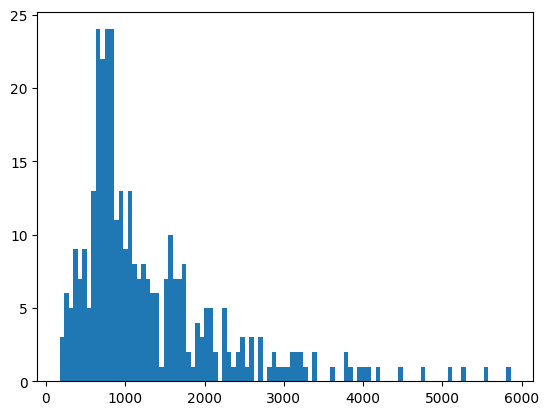

In [ ]:
dataset_url = "https://gist.githubusercontent.com/igorrochap/0aa66215571702e2f27a45645ec874c0/raw/1ef0f6967857f6b5fcffea8e41faab9984a4e529/imdb_reviews.csv"
df = pd.read_csv(dataset_url)
reviews = df["review"]

text_lengths = [len(texto) for texto in reviews]

print(text_lengths)

plt.hist(text_lengths, bins=100)
plt.show()

## 5. Aplique os seguintes passos de pré-processamento aos textos:
## • Remova todas as palavras que contêm números;
## • Converta as palavras para minúsculas;
## • Remova pontuação;
## • Tokenize os textos em palavras, gerando um dicionário único com n tokens e convertendo cada texto em um vetor de dimensão n com a respectiva contagem de palavras.
## Em seguida, encontre as 10 palavras mais frequentes da base de textos.

In [ ]:
def remove_html_tags(text):
  regex = re.compile(r'<.*?>')
  return regex.sub("", text)

def remove_digits(text):
  regex = re.compile(r'\w*\d\w*')
  return regex.sub("", text)

def remove_punctuation(text):
  regex = re.compile('[%s]' % re.escape(string.punctuation))
  return regex.sub("", text)

def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

def get_word_count(tokens):
  unique_tokens = list(dict.fromkeys(tokens))
  token_count = {}
  for token in unique_tokens:
    count = tokens.count(token)
    token_count.update({token: count})
  return token_count

def find_10_most_used_words(texts_word_count):
  full_count = {}
  for tokens in texts_word_count:
    for token, count in tokens.items():
      if token in full_count:
        full_count[token] = count + full_count[token]
        continue
      full_count[token] = count
  full_count = sorted(full_count.items(), key = lambda x:x[1], reverse = True)
  return full_count[:10]

texts_word_count = []

for review in reviews:
  review = remove_html_tags(review)
  review = remove_digits(review)
  review = review.lower()
  review = remove_punctuation(review)
  tokens = tokenize(review)
  texts_word_count.append(get_word_count(tokens))

most_used_words = find_10_most_used_words(texts_word_count)
print(most_used_words)

[('the', 4529), ('and', 2315), ('a', 2252), ('of', 2087), ('to', 1831), ('is', 1417), ('in', 1242), ('this', 1004), ('i', 982), ('it', 945)]


## 6. Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:

## • Remova stopwords;
## • Realize rotulação de POS;
## • Realize stemização;

In [ ]:
def remove_stopwords(tokens):
  stopwords_list = stopwords.words('english')
  tokens = [token for token in tokens if token not in stopwords_list]
  return tokens

def stemming(tokens):
  stemmer = LancasterStemmer()
  stems = []
  for token in tokens:
    stems.append(stemmer.stem(token))
  return stems

texts_word_count = []
texts_tags = []
texts_stems = []
texts_tokens = []
for review in reviews:
  review = remove_html_tags(review)
  review = remove_digits(review)
  review = review.lower()
  review = remove_punctuation(review)
  tokens = tokenize(review)
  tokens = remove_stopwords(tokens)

  texts_word_count.append(get_word_count(tokens))
  texts_tags.append(pos_tag(tokens))
  texts_stems.append(stemming(tokens))
  texts_tokens.append(tokens)

## a) Exiba os resultados em alguns textos.

In [ ]:
print("##### WITHOUT STOP WORDS #####\n")
for i in range(10):
  print(texts_tokens[i], "\n");

print("##### TAGS #####\n")
for i in range(10):
  print(texts_tags[i], "\n");

print("##### STEMMING #####\n")
for i in range(10):
  print(texts_stems[i], "\n");

##### WITHOUT STOP WORDS #####

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pi

## b) Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão anterior.

In [ ]:
most_used_words_without_stopwords = find_10_most_used_words(texts_word_count)

print("Most used words with stopwords: \n", most_used_words)
print("\nMost used words without stopwords: \n", most_used_words_without_stopwords)

Most used words with stopwords: 
 [('the', 4529), ('and', 2315), ('a', 2252), ('of', 2087), ('to', 1831), ('is', 1417), ('in', 1242), ('this', 1004), ('i', 982), ('it', 945)]

Most used words without stopwords: 
 [('movie', 581), ('film', 519), ('one', 326), ('like', 268), ('even', 177), ('would', 168), ('good', 158), ('really', 157), ('see', 150), ('story', 145)]


## c) Repita a letra b) usando os tokens stemizados.

In [ ]:
stems_count = []
for stems in texts_stems:
  stems_count.append(get_word_count(stems))

most_used_stems = find_10_most_used_words(stems_count)
print(most_used_stems)

[('movy', 701), ('film', 633), ('act', 345), ('on', 343), ('lik', 300), ('ev', 288), ('real', 277), ('get', 209), ('charact', 199), ('watch', 195)]


## d) Verifique quais são as classes gramaticais mais frequentes.

In [ ]:
def count_tag_occurrences(texts_tags):
  tag_count = {}
  for text in texts_tags:
    for _, tag in text:
      if tag in tag_count:
        tag_count[tag] += 1
        continue
      tag_count[tag] = 1
  tag_count = sorted(tag_count.items(), key = lambda x:x[1], reverse = True)
  return tag_count

tag_count = count_tag_occurrences(texts_tags)
print(tag_count, "\n")

print("###### LABELS ######")
nltk.help.upenn_tagset()

[('NN', 13884), ('JJ', 8357), ('NNS', 4338), ('RB', 3610), ('VBP', 2125), ('VBG', 1846), ('VBD', 1581), ('VBZ', 1196), ('VBN', 1028), ('VB', 1003), ('IN', 836), ('CD', 515), ('MD', 401), ('JJS', 205), ('JJR', 135), ('DT', 122), ('RBR', 121), ('PRP', 82), ('FW', 48), ('RP', 37), ('CC', 35), ('NNP', 32), ('RBS', 16), ('WP$', 16), ('WDT', 15), ('WP', 11), ('WRB', 8), ('TO', 5), ('UH', 4), ('PRP$', 3), ("''", 1)] 

###### LABELS ######
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
 